# Week 10: $k$-means and elbows

## Goals:
- See strengths and weaknesses of $k$-means
- Elbow plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans

## Examples with $k$-means

We will use the $k$-means algorithm in `sci-kit learn`, but I want the basic version. 

You can find more details about the [$k$-means algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from `sci-kit learn`.

So here's a wrapper function to give us the basic $k$-means algorithm.

In [2]:
def BasicKMeans(k, data):
    return KMeans(n_clusters=k, init='random', n_init=1).fit(data)

Let's create another wrapper function to stop after one iteration, so randomly select and then one more step.

In [3]:
def BasicKMeans_2(k, data):
    return KMeans(n_clusters=k, init='random', n_init=1, max_iter=1).fit(data)

The following code will produce nice Voronoi tessellations, given the data points and centroids.

In [4]:
def Voronoi(data, kmeans=None):
    import numpy as np
    import matplotlib.pyplot as plt 

    x_min = (data.T)[0].min()
    x_max = (data.T)[0].max()
    y_min = (data.T)[1].min()
    y_max = (data.T)[1].max()
    ma = max(x_max, y_max)
    mi = min(x_min, y_min)
    x_min -= (ma - mi)/20
    y_min -= (ma - mi)/20
    x_max += (ma - mi)/20
    y_max += (ma - mi)/20

    plt.figure(1)
    plt.clf()
    if kmeans:
        incr = 0.01
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, incr), 
            np.arange(y_min, y_max, incr)
        )
        Z = np.c_[xx.ravel(), yy.ravel()]
        L = kmeans.predict(Z)
        L = L.reshape(xx.shape)
        plt.imshow(
            L,
            interpolation="nearest",
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
            aspect="auto",
            origin="lower",
        )
        plt.tick_params(
            left = False, 
            right = False, 
            labelleft = False, 
            labelbottom = False, 
            bottom = False
        )
    plt.scatter(data[:,0], data[:,1], c="black")    
    if kmeans:
        cents = kmeans.cluster_centers_
        plt.scatter(cents[:,0], cents[:,1], c="white", marker="x", linewidths=2, s=100)
    return plt

### A Clear Case

First we will look at the data set `three_clusters_clear.csv`. We will plot this with `Voronoi`.

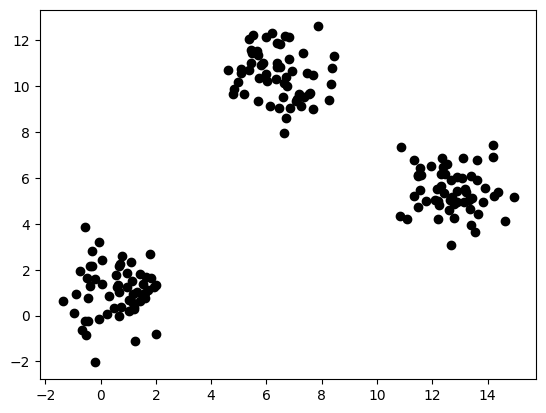

In [5]:
data_3c = pd.read_csv("data/three_clusters_clear.csv").to_numpy()
plot = Voronoi(data_3c)

In [6]:
kmeans_data_3c = BasicKMeans(3, data_3c)
print(kmeans_data_3c.cluster_centers_)

[[ 0.5682233   1.06867418]
 [12.72207651  5.44466063]
 [ 6.44212389 10.50868003]]


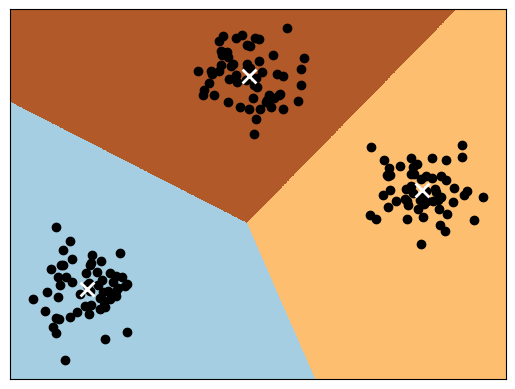

In [7]:
plot = Voronoi(data_3c, kmeans=kmeans_data_3c)

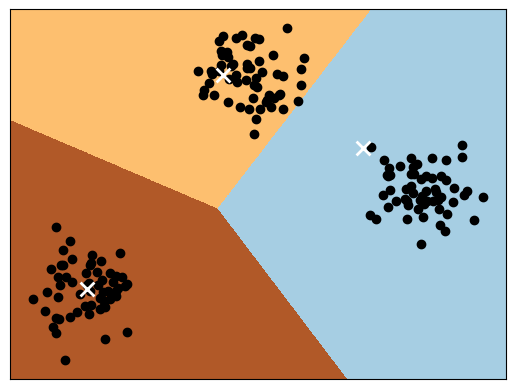

In [8]:
plot = Voronoi(data_3c, kmeans=BasicKMeans_2(3, data_3c))

### Not So Clear Case

Now we will load the `three_clusters_vague.csv` data set, which still has three clusters.

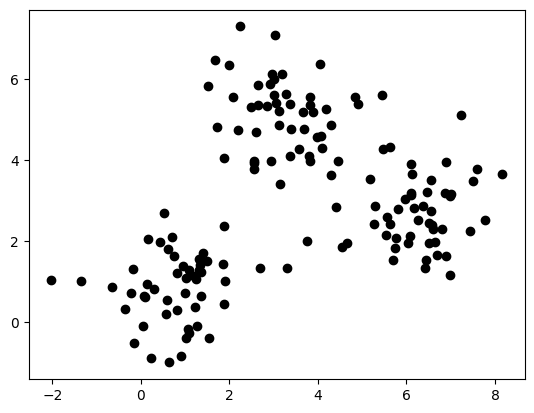

In [9]:
data_3v = pd.read_csv("data/three_clusters_vague.csv").to_numpy()
plot = Voronoi(data_3v)

In [10]:
kmeans_data_3v = BasicKMeans(3, data_3v)
print(kmeans_data_3v.cluster_centers_)

[[0.80545702 0.84470154]
 [6.22860904 2.69931237]
 [3.23621461 5.1101824 ]]


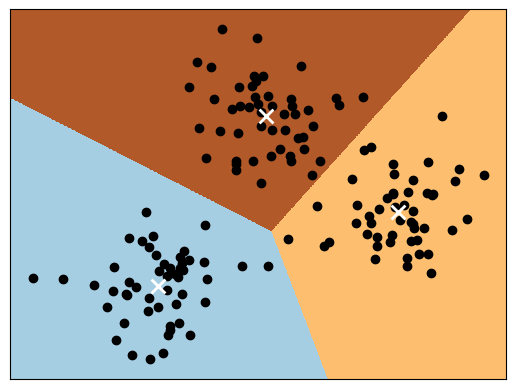

In [11]:
plot = Voronoi(data_3v, kmeans=kmeans_data_3v)

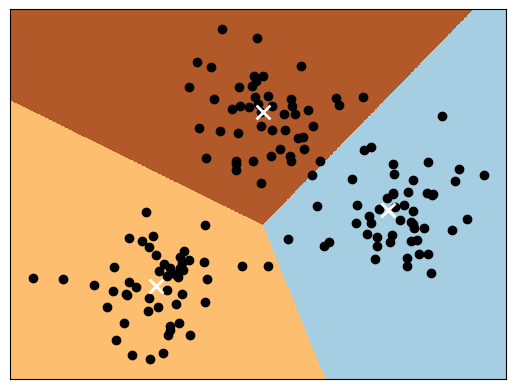

In [12]:
plot = Voronoi(data_3v, kmeans=BasicKMeans_2(3, data_3v))

### Clear but 'unbalanced'

Now we will load a new data set where $k$-means is sometimes 'successful'.

**Note.** $k$-means is neither successful or unsuccessful. It does what it does. 'Success' is based on our definition of what the clusters ought to be in the data. 

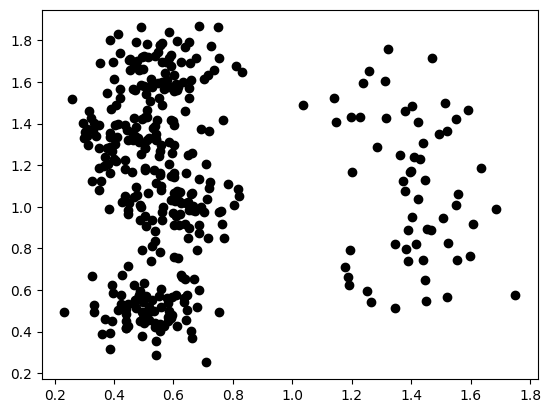

In [13]:
data_2u = np.array(pd.read_csv("data/two_clusters_unblanaced.csv"))
plot = Voronoi(data_2u)

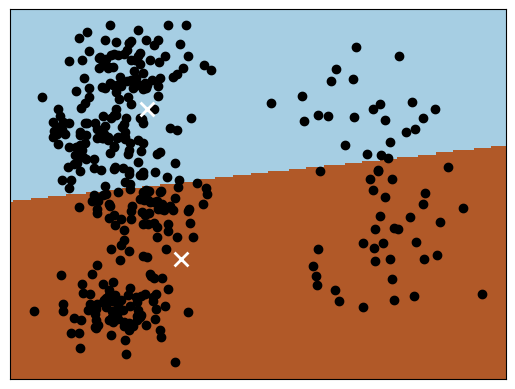

In [14]:
plot = Voronoi(data_2u, kmeans=BasicKMeans(2, data_2u))

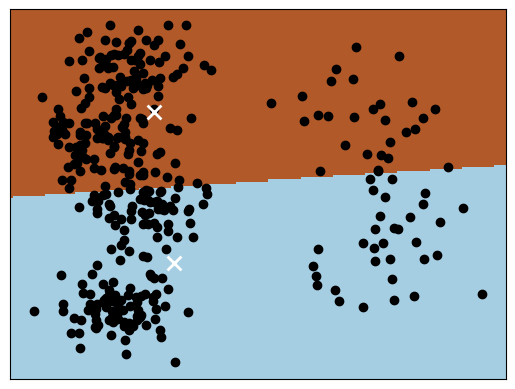

In [15]:
plot = Voronoi(data_2u, kmeans=BasicKMeans_2(2, data_2u))